# Exponentially weighted average for an X and Y plot

This script has several functions:

- Estimate an exponentially weighted average for
    abscissa, ordinate = integer, float
- Estimate an exponentially weighted average for
    abscissa, ordinate = datetime, float
- Plot the raw data as a scatter plot
- Plot the exponentially weighted average as a line plot

In [1]:
from typing import Callable, List, Tuple
import datetime
import time

In [2]:
import datasense as ds

In [3]:
def main():
    start_time = time.time()
    global figsize, date_time_parser
    file_names, graph_file_names, abscissa_names, ordinate_names,\
        ordinate_predicted_names, x_axis_label, y_axis_label, axis_title,\
        figsize, column_names_sort, date_time_parser,\
        date_formatter, alpha_value, function, output_url,\
        header_title, header_id, parser = parameters()
    original_stdout = ds.html_begin(
        output_url=output_url,
        header_title=header_title,
        header_id=header_id
    )
    print('<pre style="white-space: pre-wrap;">')
    for (
        file_name,
        abscissa_name,
        ordinate_name,
        ordinate_predicted_name,
        date_time_parser,
        column_names_sort,
        date_formatter,
        graph_file_name
    ) in zip(
        file_names,
        abscissa_names,
        ordinate_names,
        ordinate_predicted_names,
        date_time_parser,
        column_names_sort,
        date_formatter,
        graph_file_names
    ):
        if date_time_parser == 'None':
            data = ds.read_file(
                file_name=file_name,
                sort_columns=column_names_sort,
                sort_columns_bool=True
            )
        else:
            data = ds.read_file(
                file_name=file_name,
                parse_dates=[abscissa_name],
                sort_columns=column_names_sort,
                sort_columns_bool=True
            )
        data[ordinate_predicted_name] = data[ordinate_name]\
            .ewm(alpha=alpha_value).mean()
        fig, ax = ds.plot_scatter_line_x_y1_y2(
            X=data[abscissa_name],
            y1=data[ordinate_name],
            y2=data[ordinate_predicted_name],
            figsize=figsize
        )
        ax.set_title(axis_title, fontweight='bold')
        ax.set_xlabel(x_axis_label, fontweight='bold')
        ax.set_ylabel(y_axis_label, fontweight='bold')
        ds.despine(ax)
        fig.savefig(
            fname=f'{graph_file_name}.svg',
            format='svg'
        )
        ds.html_figure(file_name=f'{graph_file_name}.svg')
    ds.page_break()
    stop_time = time.time()
    ds.report_summary(
        start_time=start_time,
        stop_time=stop_time,
        read_file_names=file_names,
        targets=ordinate_names,
        features=abscissa_names
    )
    print('</pre>')
    ds.html_end(
        original_stdout=original_stdout,
        output_url=output_url
    )

In [4]:
def parameters() -> (
    List[str],
    List[str],
    List[str],
    List[str],
    List[str],
    str,
    str,
    str,
    Tuple[float],
    List[bool],
    List[str],
    List[str],
    str,
    float,
    str,
    str,
    str,
    str,
    str
):
    '''
    Set parameters.
    '''

    parameters = ds.read_file(
        file_name='exponentially_weighted_average_parameters.ods'
    )
    file_names = [x for x in parameters['File names'] if str(x) != 'nan']
    graph_file_names = [x for x in parameters['Graph file names']
                        if str(x) != 'nan']
    abscissa_names = [x for x in parameters['Abscissa names']
                      if str(x) != 'nan']
    ordinate_names = [x for x in parameters['Ordinate names']
                      if str(x) != 'nan']
    ordinate_predicted_names = [
        x for x in parameters['Ordinate predicted names']
        if str(x) != 'nan'
    ]
    xaxislabel = parameters['Other parameter values'][0]
    yaxislabel = parameters['Other parameter values'][1]
    axistitle = parameters['Other parameter values'][2]
    figurewidthheight = eval(parameters['Other parameter values'][3])
    column_names_sort = [x for x in parameters['Column names sort']
                         if str(x) != 'nan']
    date_time_parser = [x for x in parameters['Date time parser']
                        if str(x) != 'nan']
    parser = parameters['Other parameter values'][4]
    date_formatter = [None
                      if split.strip() == 'None' else
                      split.strip()
                      for unsplit
                      in parameters['Date formatter']
                      if str(unsplit) != 'nan'
                      for split
                      in unsplit.split(',')]
    alphavalue = parameters['Other parameter values'][6]
    function = parameters['Other parameter values'][7]
    output_url = parameters['Other parameter values'][8]
    header_title = parameters['Other parameter values'][9]
    header_id = parameters['Other parameter values'][10]
    return (
        file_names, graph_file_names, abscissa_names, ordinate_names,
        ordinate_predicted_names, xaxislabel, yaxislabel, axistitle,
        figurewidthheight, column_names_sort, date_time_parser, date_formatter,
        alphavalue, function, output_url, header_title, header_id, parser
    )

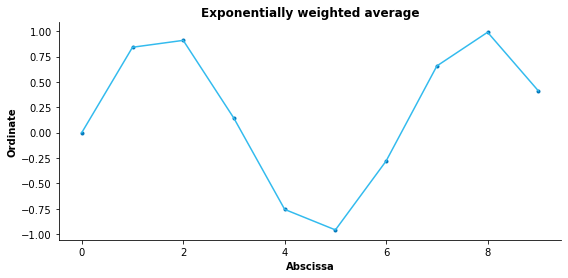

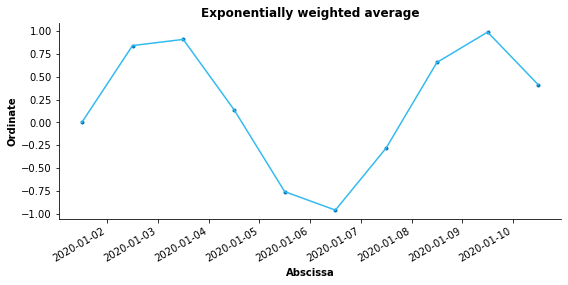

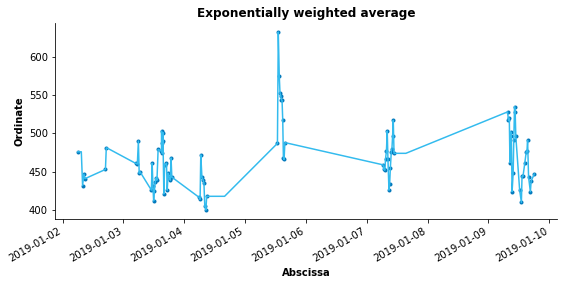

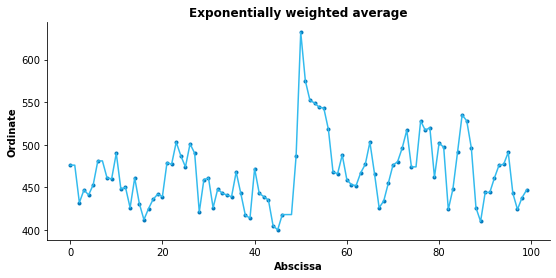

In [5]:
if __name__ == '__main__':
    main()